In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

from BST import HashTable as HashTableBST
from AVL import HashTable as HashTableAVL

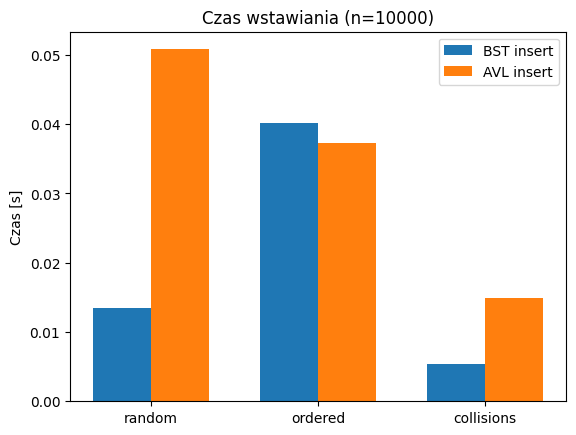

In [ ]:
# Funkcja do generowania kluczy
def generate_keys(n, scenario):
    if scenario == 'random':
        return [random.randint(0, n*10) for _ in range(n)]
    if scenario == 'ordered':
        base = list(range(n))
        noise = [random.randint(-5,5) for _ in range(n)]
        return [max(0, base[i] + noise[i]) for i in range(n)]
    if scenario == 'collisions':
        return [random.randint(0, n//10) for _ in range(n)]

# Pomiar czasu wstawiania i wyszukiwania
def benchmark(table_cls, keys):
    ht = table_cls(size=100)
    # Wstawianie
    start = time.perf_counter()
    for k in keys:
        ht.insert(k, k)
    t_insert = time.perf_counter() - start
    # Wyszukiwanie
    start = time.perf_counter()
    for k in keys:
        _ = ht.search(k)
    t_search = time.perf_counter() - start
    return t_insert, t_search

# Parametry
n = 10000
scenarios = ['random', 'ordered', 'collisions']
results = { 'BST': {}, 'AVL': {} }

for scenario in scenarios:
    keys = generate_keys(n, scenario)
    results['BST'][scenario] = benchmark(HashTableBST, keys)
    results['AVL'][scenario] = benchmark(HashTableAVL, keys)

# Wizualizacja wyników
labels = scenarios
bst_insert = [results['BST'][s][0] for s in scenarios]
avl_insert = [results['AVL'][s][0] for s in scenarios]
bst_search = [results['BST'][s][1] for s in scenarios]
avl_search = [results['AVL'][s][1] for s in scenarios]

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bst_insert, width, label='BST insert')
rects2 = ax.bar(x + width/2, avl_insert, width, label='AVL insert')
ax.set_ylabel('Czas [s]')
ax.set_title('Czas wstawiania (n=10000)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()